<a href="https://colab.research.google.com/github/FajarKKP/Coding/blob/main/Dnn_Time_series_Synth_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [9]:
def plot_series(time, series, format='-', start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(False)

def trend(time, slope=0):
  return slope + time

def seasonal_pattern(season_time):
  return np.where(season_time<0.1, np.cos(season_time*6*np.pi), 2/np.exp(9*season_time))

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time+phase)%period) /period 
  return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.rand(len(time)) * noise_level   

time = np.arange(10* 365+1, dtype="float32")
baseline = 10
series = trend(time,0.1)
amplitude = 40
slope = 0.005
noise_level = 3

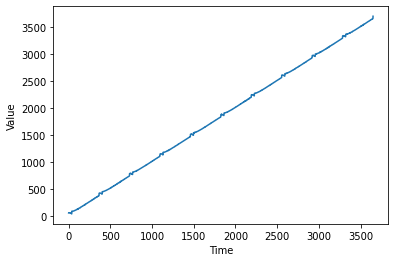

In [10]:
# Make the series
series = baseline + trend(time,slope) + seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)